In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

Using TensorFlow backend.


## 모멘텀의 동작 코드와 단위테스트(keras를 이용함.)

In [138]:
X=np.array([1,2,3,4,5,6,7,8,9])
y=np.array([11,22,33,44,53,66,77,87,95])
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(X,y, batch_size=300, epochs=300, verbose=0)

## 단위테스트(비교)를 위해서 np.polyfit으로 예측함.

In [139]:
p1 = np.polyfit(X,y,1)

In [140]:
a  = p1[0] * 1 + p1[1] # np.polyfit의 x=1일때의 예측값 x=1일때의 실제 값은 11임.
print(a)

11.488888888888916


In [141]:
b = float(model.predict(X)[0])#keras의 x=1일때의 예측값 x=1일때의 실제 값은 11임.
print(b)

11.488890647888184


## 단위테스트 실시 -> x=1일때의 polyfit예측값과 keras예측값을 비교함.

In [142]:
import unittest
class Test(unittest.TestCase):
    def test_fit(self):
        self.assertAlmostEqual(a,b,1)

In [143]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## 모멘텀을 class로 구현함.

In [130]:
class Momentum:
    def __init__(self,lr=0.0001, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self,params, grads):
        if self.v is None:
            self.v = np.zeros_like(grads)
        self.v = self.momentum * self.v - self.lr * grads
        params += self.v

## 모멘텀으로 (x-1)^2의 최소점을 계산함.

In [131]:
m = Momentum()

In [132]:
# y = (x-1) ^ 2에 대해서 momentum 알고리즘 적용하기 -> 기대하는 값 = 1

In [133]:
x = np.linspace(-10,10,10)
y = (x-1)**2

In [134]:
def dcee_func(val) :
    return 2 * (val - 1)

In [135]:
val = np.array(10.)
err = 0.0000000000000000000001
#(10,81)점에서부터 시작함.
calc_err = 100
grads=np.array(dcee_func(val))
while True:
    if(calc_err < err):
        print(val)
        break
    m.update(val,grads)
    calc_err = dcee_func(val)

0.9820000000000364


## 값을 잘 예측했는지 확인함.

In [136]:
import unittest

class Test(unittest.TestCase):
    def test_fit(self):
        self.assertAlmostEquals(val, 1, places = 1)
        
    def test_initdata1(self):
        self.assertEqual(m.lr,0.0001)
        
    def test_initdata2(self):
        self.assertEqual(m.momentum,0.9)

In [137]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Please use assertAlmostEqual instead.
  """
...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


## 모멘텀으로 로젠브록함수 계산하기

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
m = Momentum()

In [117]:
params = np.array([-1.,-1.])
print(params[1])

-1.0


In [118]:
def los(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

In [119]:
def losg(x, y):
    return np.array([2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)])

In [120]:
grads = losg(params[0],params[1])

In [121]:
grads

array([-804., -400.])

[1.00000012 1.00000025]


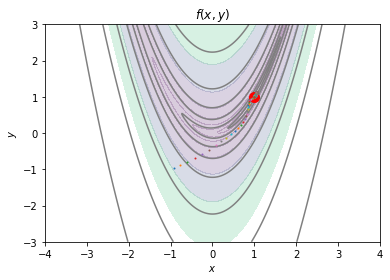

In [123]:
import time
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = los(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$f(x,y)$")

startTime = time.time()
idx = 0
while True:
    if(abs(grads[0]) < 0.0000001 and abs(grads[1]) < 0.0000001):
        print(params)
        break
    m.update(params,grads)
    temp = losg(params[0],params[1])
    grads = temp
    plt.plot(params[0],params[1] , 'o', markersize=1)
    idx += 1
endTime = time.time()

In [124]:
print(endTime-startTime) #그래프 그리는 시간까지 포함된 시간입니다.

42.23505139350891


In [125]:
print(idx)

32994


## 로젠브록함수 경사하강법으로 예측하기

In [60]:
class SGD:
    def __init__(self, lr=0.0001):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i] 

In [61]:
s = SGD()
params = [-1,-1]
grads = losg(params[0],params[1])

0.9999998750501353 0.9999997496002868


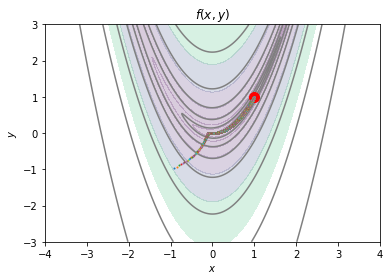

In [62]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = los(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$f(x,y)$")

startTime = time.time()
idx = 0
while True:
    if(abs(grads[0]) < 0.0000001 and abs(grads[1]) < 0.0000001):
        print(params[0],params[1])
        break
    s.update(params,grads)
    temp = losg(params[0],params[1])
    grads[0] = temp[0]
    grads[1] = temp[1]
    plt.plot(params[0],params[1] , 'o', markersize=1)
    idx += 1
endTime = time.time()

In [64]:
print(endTime - startTime)#그래프를 그리는 시간까지 포함한 것입니다.

469.4837031364441


In [65]:
print(idx)

368638
